<center><strong><h1>Exploratory Data Analysis (EDA) on bogra_01022013_19102023</center></strong></h1>

---


<center><strong><h2> Introduction</center></strong></h2>

<center>In this notebook, we will perform Exploratory Data Analysis (EDA) on the "bogra_01022013_19102023" dataset. EDA is a crucial first step in the data analysis process, helping us understand the data's structure, distribution, and relationships. We will explore the dataset and gain insights into its key characteristics.</center>

---

<center><strong><h2>Dataset Information</center></strong></h2>

Source:
[BangladeshChapter_FloodGuard]you have put right lick here (https://dagshub.com/Omdena/BangladeshChapter_FloodGuard/src/main/src/data/Raj_Weather_combined/Barisal_Weather_combined.csv)

Purpose:

Dataset combines weather-related information from various sources and data collection-preprocessing team scraped this data.For

EDA,Model Developnment and Deployment.

---


<center><strong><h2>Setup & Importing Libraries</center></strong></h2>


In [141]:
!pip install plotly

In [167]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sbs
import matplotlib.pyplot as plt

In [176]:
file=pd.read_csv("bogra_01022013_19102023.csv")
file.drop("Unnamed: 0",axis=1,inplace=True)
file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Bogra,2013-02-01,21.1,11.1,15.0,21.1,11.1,15.0,8.1,64.3,...,5.3,3,NaN,2013-02-01T06:45:01,2013-02-01T17:47:30,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"remote,41883099999"
1,Bogra,2013-02-02,26.7,9.2,17.3,26.7,7.6,17.1,7.6,56.0,...,15.5,7,NaN,2013-02-02T06:44:33,2013-02-02T17:48:13,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"remote,41883099999"
2,Bogra,2013-02-03,27.2,12.1,18.3,26.8,12.1,18.2,6.1,47.2,...,16.3,7,NaN,2013-02-03T06:44:05,2013-02-03T17:48:55,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"remote,41883099999"
3,Bogra,2013-02-04,28.7,11.5,19.8,27.3,11.5,19.6,8.0,50.1,...,17.3,7,NaN,2013-02-04T06:43:35,2013-02-04T17:49:37,0.79,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"remote,41883099999"
4,Bogra,2013-02-05,30.5,13.0,21.1,28.8,13.0,20.7,9.2,49.9,...,18.3,8,NaN,2013-02-05T06:43:04,2013-02-05T17:50:18,0.82,Clear,Clear conditions throughout the day.,clear-day,"remote,41883099999"


In [177]:
file.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [178]:
file.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1707
snow                3265
snowdepth           3265
windgust            3236
windspeed              0
winddir                0
sealevelpressure      43
cloudcover             0
visibility            43
solarradiation         0
solarenergy            0
uvindex                0
severerisk          3265
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

I have taken the decison to drop these below mentioned columns because in heatmap they are not relating with other columns 

strongly or positively and they have Nan values number close to datapoints(3913) in the dataset we have.

In [179]:
columns_to_drop=['snow','snowdepth','windgust','name']
file.drop(columns=columns_to_drop,axis=1,inplace=True)

In [180]:
file.dtypes

datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [181]:
file.shape

(3913, 29)

<h4>Data Cleaning:</h4>

---

<h4>Identifying and Removing Outliers:</h4>

---

For numerical columns like tempmax_x, tempmin_x, temp, feelslikemax, and others:
Are there any outliers (box plot)?


Note: I am checking outliers for all numerical columns not going for specific:

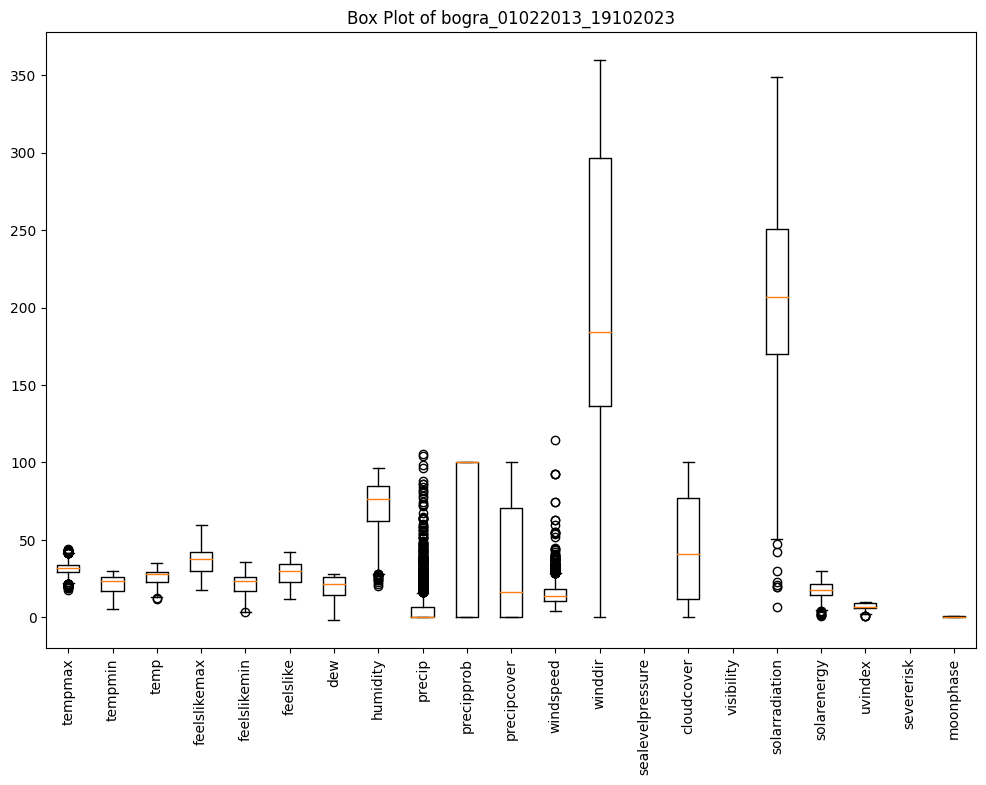

In [182]:
numeric_columns =file.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of bogra_01022013_19102023")
plt.xticks(rotation=90)
plt.show()

In [183]:
columns_having_outliers=['tempmax','temp','feelslikemin''humidity','precip','windspeed','solarradiation','solarenergy','unindex']

In [184]:
def remove_outliers(data, columns_having_outliers, threshold=1.5):
    data_no_outliers = data.copy()
    for column in columns_having_outliers:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]
    return data_no_outliers
df=remove_outliers(file, columns_having_outliers)
df.shape

(3326, 29)

Filling Nan values with mean() and mode() such that mean() for "int" or "float" data type and mode() for "object" data type:

In [185]:
for column in df.columns:
    if any(df[column].isnull()):
        if df[column].dtype=='int' or df[column].dtype=='float':
                 df[column].fillna(df[column].mean(),inplace=True)
        elif df[column].dtype=='object':
                 df[column].fillna(df[column].mode().iloc[0],inplace=True)
df.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

Covnertinf "datetime" feature for further analysis:

In [186]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2013-02-02,26.7,9.2,17.3,26.7,7.6,17.1,7.6,56.0,0.0,0,...,15.5,7,24.723757,2013-02-02T06:44:33,2013-02-02T17:48:13,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"remote,41883099999"
2013-02-03,27.2,12.1,18.3,26.8,12.1,18.2,6.1,47.2,0.0,0,...,16.3,7,24.723757,2013-02-03T06:44:05,2013-02-03T17:48:55,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"remote,41883099999"
2013-02-04,28.7,11.5,19.8,27.3,11.5,19.6,8.0,50.1,0.0,0,...,17.3,7,24.723757,2013-02-04T06:43:35,2013-02-04T17:49:37,0.79,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"remote,41883099999"
2013-02-05,30.5,13.0,21.1,28.8,13.0,20.7,9.2,49.9,0.0,0,...,18.3,8,24.723757,2013-02-05T06:43:04,2013-02-05T17:50:18,0.82,Clear,Clear conditions throughout the day.,clear-day,"remote,41883099999"
2013-02-06,31.6,14.4,22.3,30.1,14.4,22.0,11.0,51.8,0.0,0,...,18.5,8,24.723757,2013-02-06T06:42:32,2013-02-06T17:50:59,0.86,Clear,Clear conditions throughout the day.,clear-day,"remote,41883099999"


<h4> Univariate Analysis</h4>
Summary statistics


In [187]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,...,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000
mean,31.658419,20.987853,25.759411,35.752856,21.448046,28.202766,19.131840,70.671167,2.561786,51.533373,...,14.004239,207.367709,1007.995832,40.325105,6.700791,211.787252,18.284125,7.410102,24.723757,0.478918
std,4.027383,5.543497,4.610255,7.212338,6.367111,6.943384,6.632738,15.161575,3.959535,49.983997,...,4.652816,94.287211,5.260907,31.907673,5.702310,51.040391,4.413070,1.537953,8.011431,0.289744
min,21.900000,5.700000,13.000000,21.900000,3.400000,12.600000,-1.800000,20.500000,0.000000,0.000000,...,4.300000,0.000000,992.500000,0.000000,0.400000,55.500000,4.700000,2.000000,10.000000,0.000000
25%,28.900000,16.400000,22.000000,29.100000,16.400000,21.925000,13.600000,60.600000,0.000000,0.000000,...,10.800000,138.425000,1003.400000,9.300000,4.000000,174.025000,15.000000,6.000000,24.723757,0.230000
50%,32.200000,22.300000,27.700000,36.700000,22.300000,28.600000,20.400000,74.700000,0.100000,100.000000,...,13.300000,191.450000,1008.050000,34.650000,4.400000,208.700000,18.100000,7.000000,24.723757,0.480000
75%,34.200000,26.100000,29.400000,42.100000,26.100000,34.600000,25.500000,83.200000,4.000000,100.000000,...,16.900000,304.075000,1012.400000,71.400000,5.000000,250.600000,21.700000,9.000000,24.723757,0.740000
max,41.400000,29.600000,33.700000,59.900000,35.700000,42.500000,28.000000,93.700000,16.000000,100.000000,...,28.400000,359.700000,1021.500000,100.000000,24.500000,340.600000,29.600000,10.000000,100.000000,0.980000


<h4>Time Series Analysis:</h4>
Line plots:

In [188]:
df['datetime_converted']=df.index

---

How Feelslike number changes over the time/year?

---

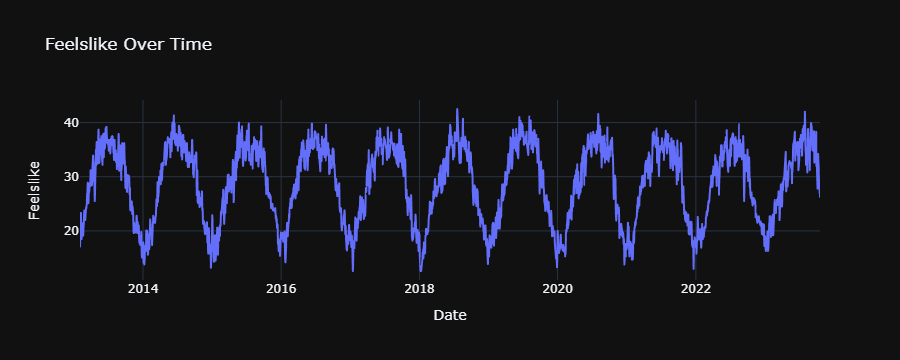

In [189]:
fig = px.line(df, x='datetime_converted', y='feelslike', title='Feelslike Over Time',template='plotly_dark')
fig.update_layout(xaxis_title='Date', yaxis_title='Feelslike')
fig.show()

---

How Temperature changes over the time/year?

---

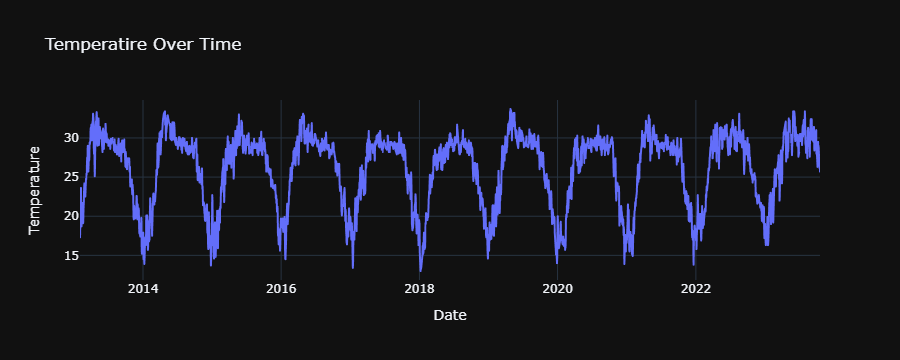

In [190]:
fig = px.line(df, x='datetime_converted', y='temp', title='Temperatire Over Time',template='plotly_dark')
fig.update_layout(xaxis_title='Date', yaxis_title='Temperature')
fig.show()

---

How Humidity changes with Time/Year?

---

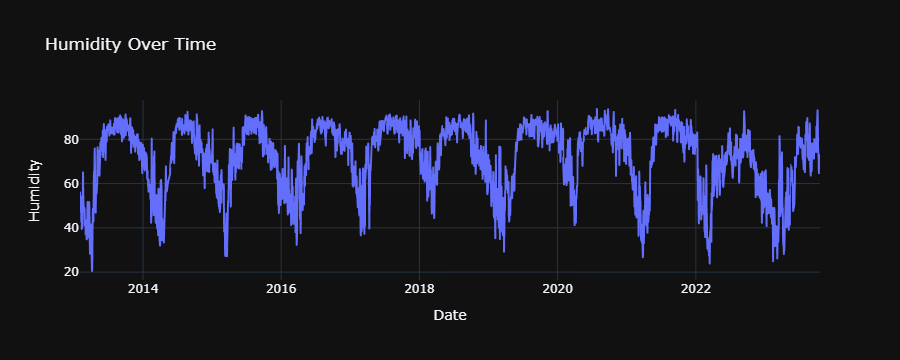

In [191]:
fig = px.line(df, x='datetime_converted', y='humidity', title='Humidity Over Time',template='plotly_dark')
fig.update_layout(xaxis_title='Date', yaxis_title='Humidity')
fig.show()

---

How Dew changes with Time/Year?

---

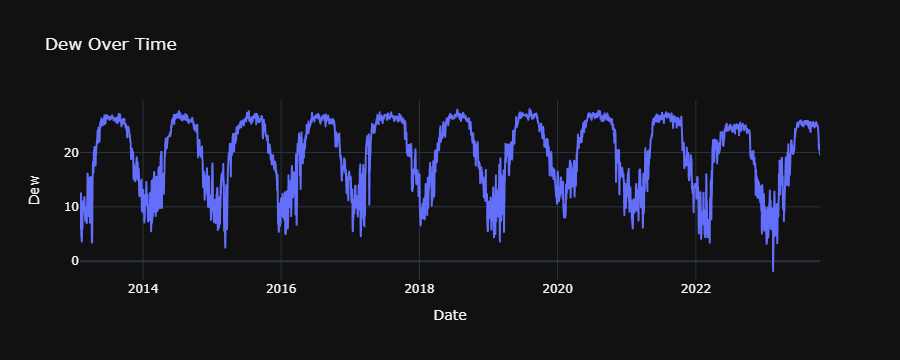

In [192]:
fig = px.line(df, x='datetime_converted', y='dew', title='Dew Over Time',template='plotly_dark')
fig.update_layout(xaxis_title='Date', yaxis_title='Dew')
fig.show()

---

How WindSpeed changes over Time?

---

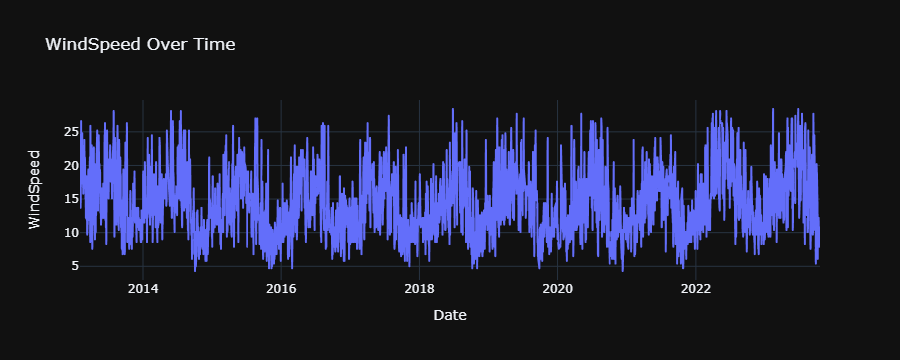

In [194]:
fig = px.line(df, x='datetime_converted', y='windspeed', title='WindSpeed Over Time',template='plotly_dark')
fig.update_layout(xaxis_title='Date', yaxis_title='WindSpeed')
fig.show()

---

<h4>Correlation Analysis:</h4>

To avoid messy heatmap. I am doing column slicing for every 7 columns that's why we have 3 heatmaps.
7X3=21

21 columns data types=int,float

---

In [195]:
numerical_dt_columns =df.select_dtypes(include=['int','float']).columns#only selecting the features having numerical values.
numerical_dt_columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase'],
      dtype='object')

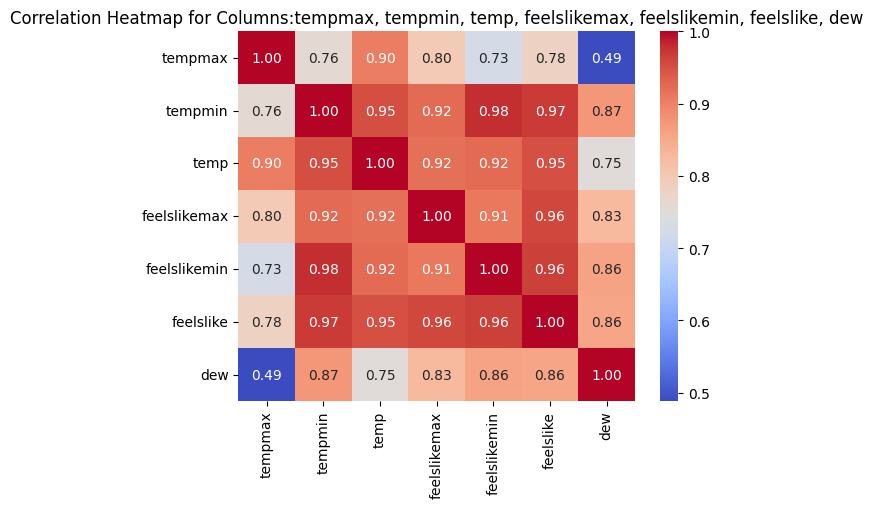

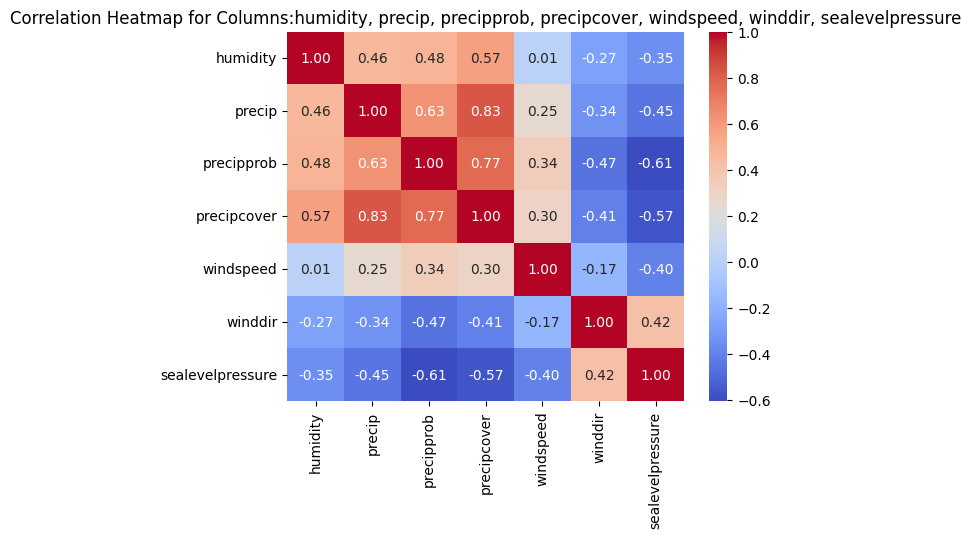

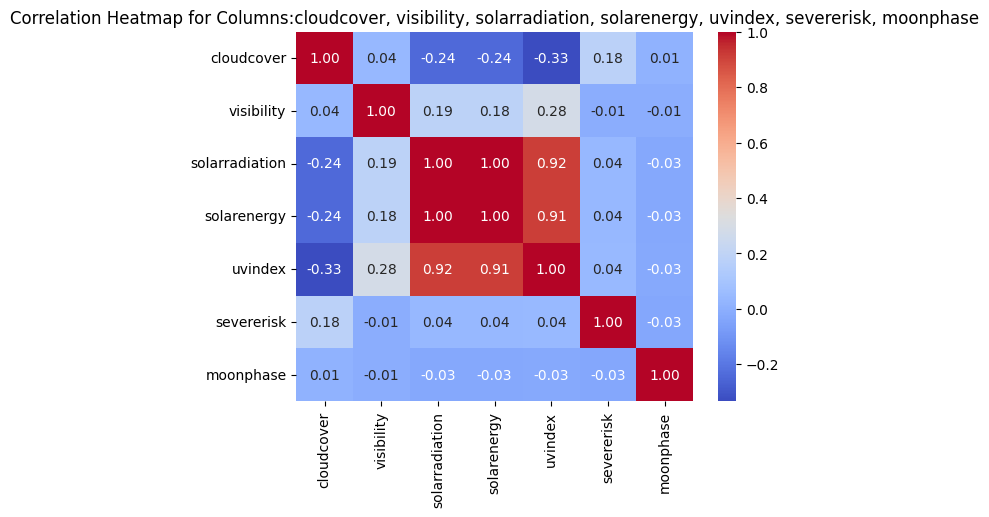

In [196]:
for i in range(0,len(numerical_dt_columns),7):
    subset_columns=numerical_dt_columns[i:i+7]
    subset_df=df[subset_columns]
    correlation_matrix= subset_df.corr()
    sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title(f'Correlation Heatmap for Columns:{", ".join(subset_columns)}')
    plt.show()

---

<h4>Pie Chart of Bogra Common Weather Conditions:</h4>

---

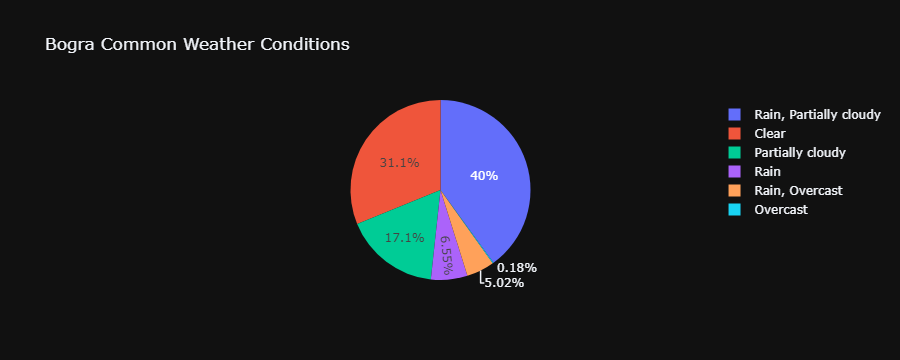

In [161]:
weather_conditions = df['conditions'].value_counts().reset_index()
weather_conditions.columns = ['Condition', 'Count']
weather_conditions = weather_conditions.sort_values(by='Count', ascending=False)
fig = px.pie(weather_conditions, names='Condition', values='Count', title='Bogra Common Weather Conditions',template='plotly_dark')
fig.show()

<h3>Histograms:</h3>


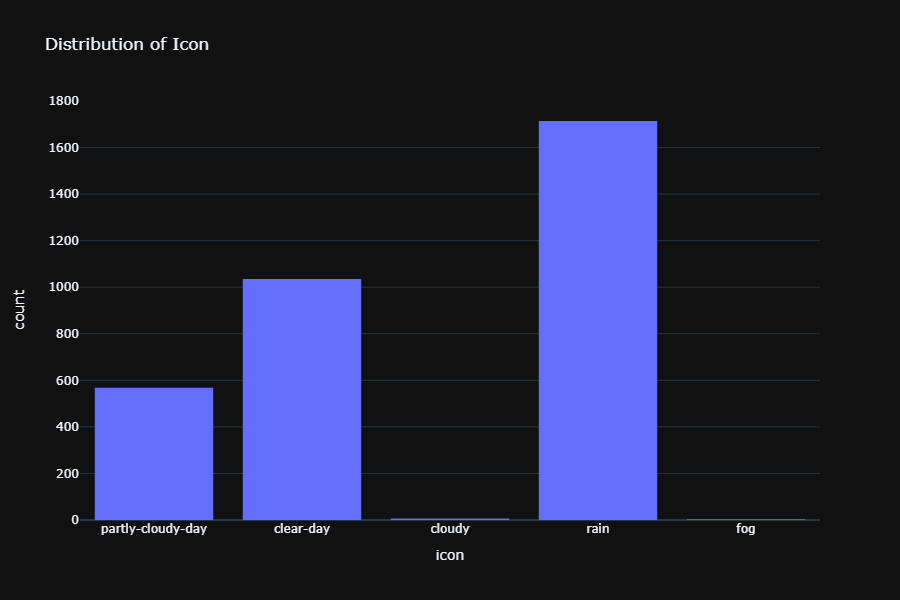

In [224]:
fig=px.histogram(df,x='icon',nbins=30,title='Distribution of Icon',template='plotly_dark')
fig.update_layout(width=800, height=600)          
fig.show()

In [227]:
df['fog_condition']=df.icon=='fog'

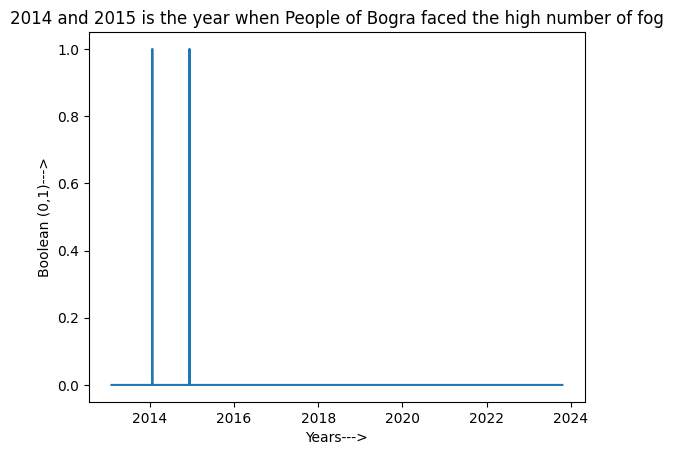

In [229]:
plt.title("2014 and 2015 is the year when People of Bogra faced the high number of fog")
plt.xlabel("Years--->")
plt.ylabel("Boolean (0,1)--->")
plt.plot(df['fog_condition'])
plt.show()

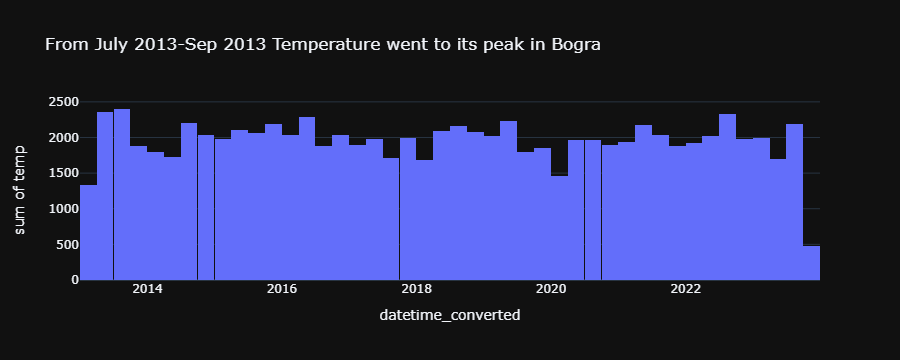

In [248]:
fig=px.histogram(df,x='datetime_converted',y='temp',title='From July 2013-Sep 2013 Temperature went to its peak in Bogra',template='plotly_dark')
fig.show()